In [1]:
from Load_Classes.Popular_Load_Class import PopularPath
from data_classes.Mod_Driver_Setup import DriverModelSetup
from data_classes.IncremDriverModel import DriverModel
import os
from executing_runs import generate_batch_script, run_batch_script

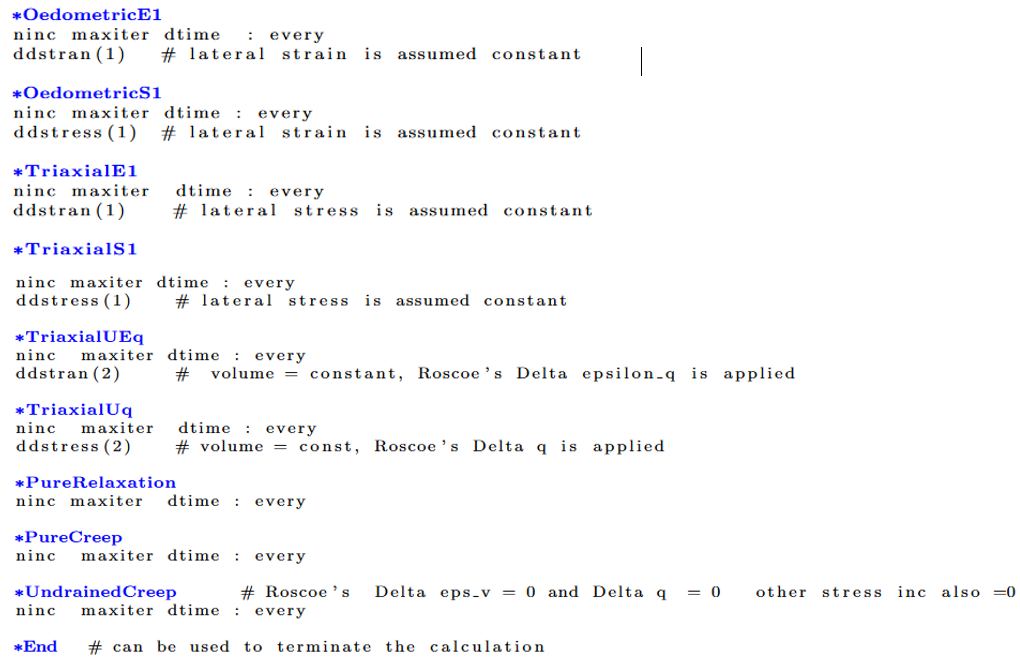

In [2]:
test_name = "OedometricE1"
load_params = {
    "ninc": 100,
    "maxiter": 999,
    "dtime"  : 0.1,
    "every"  : 1,
    "ddstran_1": 0.1,
}

load = PopularPath(test_name, load_params)

In [3]:
# This needs to be in the order that the parameters should be in
properties = {
    "Shear modulus" : 1000,
    "poisson ratio" : 0.2 
}

In [4]:
folder = r"C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup"
exe_path = r"C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\build\gfortran_E167FD2A985B468F\app\incrementalDriver.exe"

setup =DriverModelSetup(folder, "MC", "output.txt")

In [5]:
setup.store_loads(load)

In [6]:
print(setup)

Constitutive model name: MC
Folder path: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup


In [7]:
setup.write_parameters_file(properties)
setup.write_initial_conditions_file([10,2,3,4,5,6], [0])
setup.write_loads()

In [8]:
generate_batch_script(folder, exe_path)
batch_file_path = os.path.join(folder, "run_model.bat")
run_batch_script(batch_file_path)

Batch file 'C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\run_model.bat' executed successfully.


In [9]:
file_name = "spaced_string.txt"
with open(file_name, 'w') as file:
    load.write(file, num_spaces=10)

In [10]:
model= DriverModel(folder, "MC", exe_path, "output.txt")

In [11]:
model.setup.clear_folder()

Deleted: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\initialconditions.inp
Deleted: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\parameters.inp
Deleted: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\test.inp
Deleted: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\run_model.bat
Deleted: C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\output.txt


In [13]:
model.setup.write_parameters_file(properties)
model.setup.write_initial_conditions_file([10,2,3,4,5,6], [0])
model.setup.store_loads(load)
model.setup.write_loads()

In [14]:
model.run_model()

Batch file 'C:\Geotech_Research\CriticalSoilModels\pyIncrementalDriver\python_files\test_setup\run_model.bat' executed successfully.
